<a href="https://colab.research.google.com/github/sohyun329/ML_Study/blob/main/%5BML%5D%EC%9E%90%EC%A0%84%EA%B1%B0_%EB%8C%80%EC%97%AC_%EC%88%98%EC%9A%94_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


# 1. 데이터 확인

In [11]:
import numpy as np
import pandas as pd

train = pd.read_csv('/content/gdrive/MyDrive/Data/bike-sharing-demand/train.csv')
test = pd.read_csv('/content/gdrive/MyDrive/Data/bike-sharing-demand/test.csv')
submission = pd.read_csv('/content/gdrive/MyDrive/Data/bike-sharing-demand/submission.csv')

In [12]:
train.shape, test.shape

((10886, 12), (6493, 9))

In [13]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [14]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [15]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


# 2. 피처 엔지니어링

In [18]:
print(train['datetime'][100])
print(train['datetime'][100].split())
print(train['datetime'][100].split()[0])
print(train['datetime'][100].split()[1])

2011-01-05 09:00:00
['2011-01-05', '09:00:00']
2011-01-05
09:00:00


In [19]:
print(train['datetime'][100].split()[0])
print(train['datetime'][100].split()[0].split("-"))
print(train['datetime'][100].split()[0].split("-")[0])
print(train['datetime'][100].split()[0].split("-")[1])
print(train['datetime'][100].split()[0].split("-")[2])

2011-01-05
['2011', '01', '05']
2011
01
05


In [20]:
print(train['datetime'][100].split()[1])
print(train['datetime'][100].split()[1].split(":"))
print(train['datetime'][100].split()[1].split(":")[0])
print(train['datetime'][100].split()[1].split(":")[1])
print(train['datetime'][100].split()[1].split(":")[2])

09:00:00
['09', '00', '00']
09
00
00


In [21]:
train['date'] = train['datetime'].apply(lambda x:x.split()[0])

train['year'] = train['datetime'].apply(lambda x : x.split()[0].split('-')[0])
train['month'] = train['datetime'].apply(lambda x : x.split()[0].split('-')[1])
train['day'] = train['datetime'].apply(lambda x : x.split()[0].split('-')[2])

train['hour'] = train['datetime'].apply(lambda x : x.split()[1].split(':')[0])
train['minute'] = train['datetime'].apply(lambda x : x.split()[1].split(':')[1])
train['second'] = train['datetime'].apply(lambda x : x.split()[1].split(':')[2])

In [22]:
from datetime import datetime
import calendar

print(train['date'][100]) # 날짜
print(datetime.strptime(train['date'][100], '%Y-%m-%d')) # datetime 타입으로 변경
# 정수로 요일 반환
print(datetime.strptime(train['date'][100], '%Y-%m-%d').weekday())
# 문자열로 요일 반환
print(calendar.day_name[datetime.strptime(train['date'][100], '%Y-%m-%d').weekday()])

2011-01-05
2011-01-05 00:00:00
2
Wednesday


In [23]:
train.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,00,00


In [24]:
train['weekday'] = train['date'].apply(lambda dateString : calendar.day_name[datetime.strptime(dateString, "%Y-%m-%d").weekday()])

In [25]:
train.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday


In [26]:
train['season'] = train['season'].map({
    1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'
})

train['weather'] = train['weather'].map({
    1:'Clear', 2:'Mist, Few clouds', 3:'Light Snow, Rain, Thunderstorm',
    4:'Heavy Rain, Thunderstorm, Snow, Fog'
})

In [27]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04,00,00,Saturday


# 3. 시각화

In [28]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

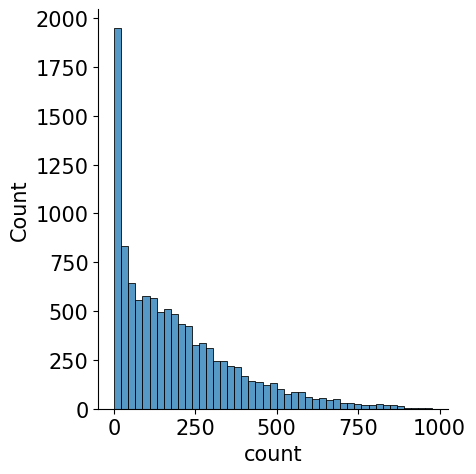

In [29]:
mpl.rc('font', size=15) # 폰트 크기 15로 설정
sns.displot(train['count'])

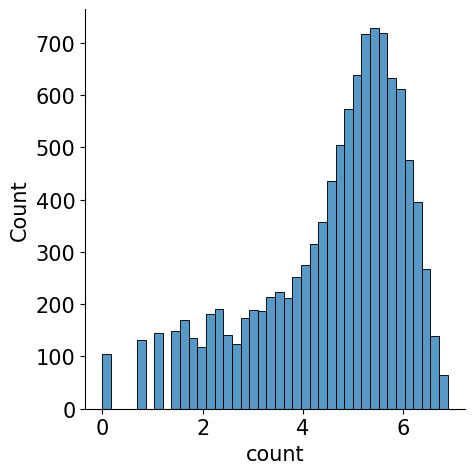

In [30]:
sns.displot(np.log(train['count']))

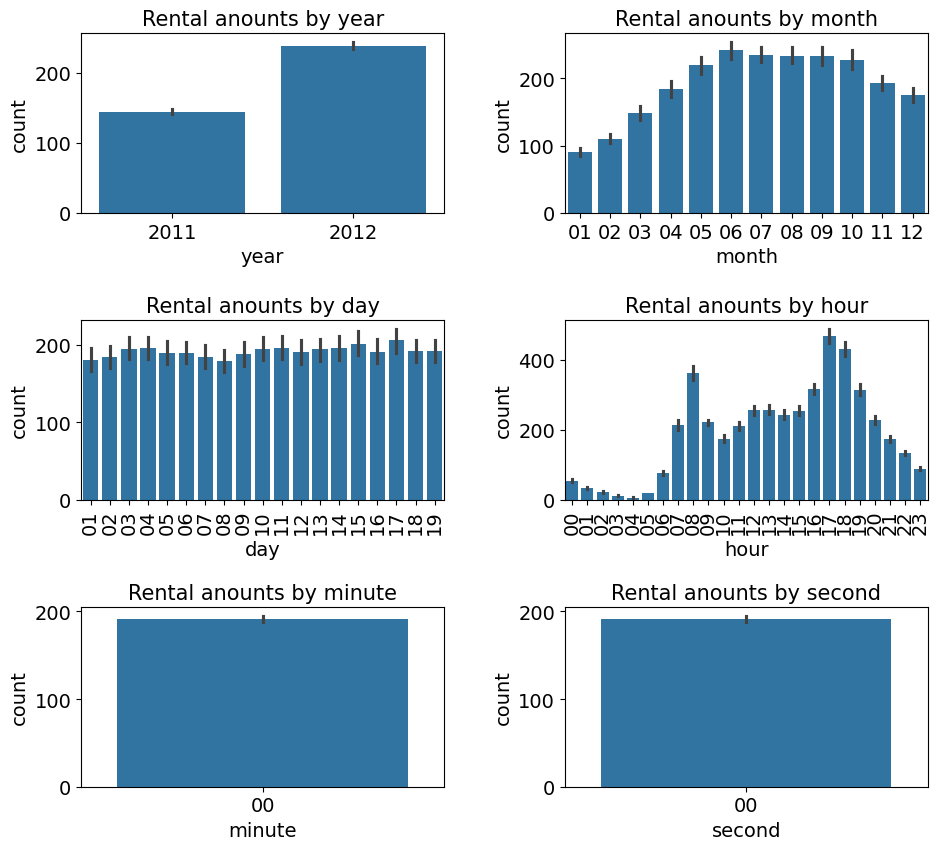

In [31]:
mpl.rc('font', size=14) # 폰트 크기 설정
mpl.rc('axes', titlesize=15) # 각 축의 제목 크기 설정

figure, axes = plt.subplots(nrows=3, ncols=2) # 3행 2열 Figure 생성
plt.tight_layout() # 그래프 사이에 여백 확보
figure.set_size_inches(10,9) # 전체 Figure 크기를 10x9인치로 설정

sns.barplot(x='year', y='count', data=train, ax=axes[0,0])
sns.barplot(x='month', y='count', data=train, ax=axes[0,1])
sns.barplot(x='day', y='count', data=train, ax=axes[1,0])
sns.barplot(x='hour', y='count', data=train, ax=axes[1,1])
sns.barplot(x='minute', y='count', data=train, ax=axes[2,0])
sns.barplot(x='second', y='count', data=train, ax=axes[2,1])

axes[0,0].set(title='Rental anounts by year')
axes[0,1].set(title='Rental anounts by month')
axes[1,0].set(title='Rental anounts by day')
axes[1,1].set(title='Rental anounts by hour')
axes[2,0].set(title='Rental anounts by minute')
axes[2,1].set(title='Rental anounts by second')

axes[1,0].tick_params(axis='x', labelrotation=90)
axes[1,1].tick_params(axis='x', labelrotation=90)

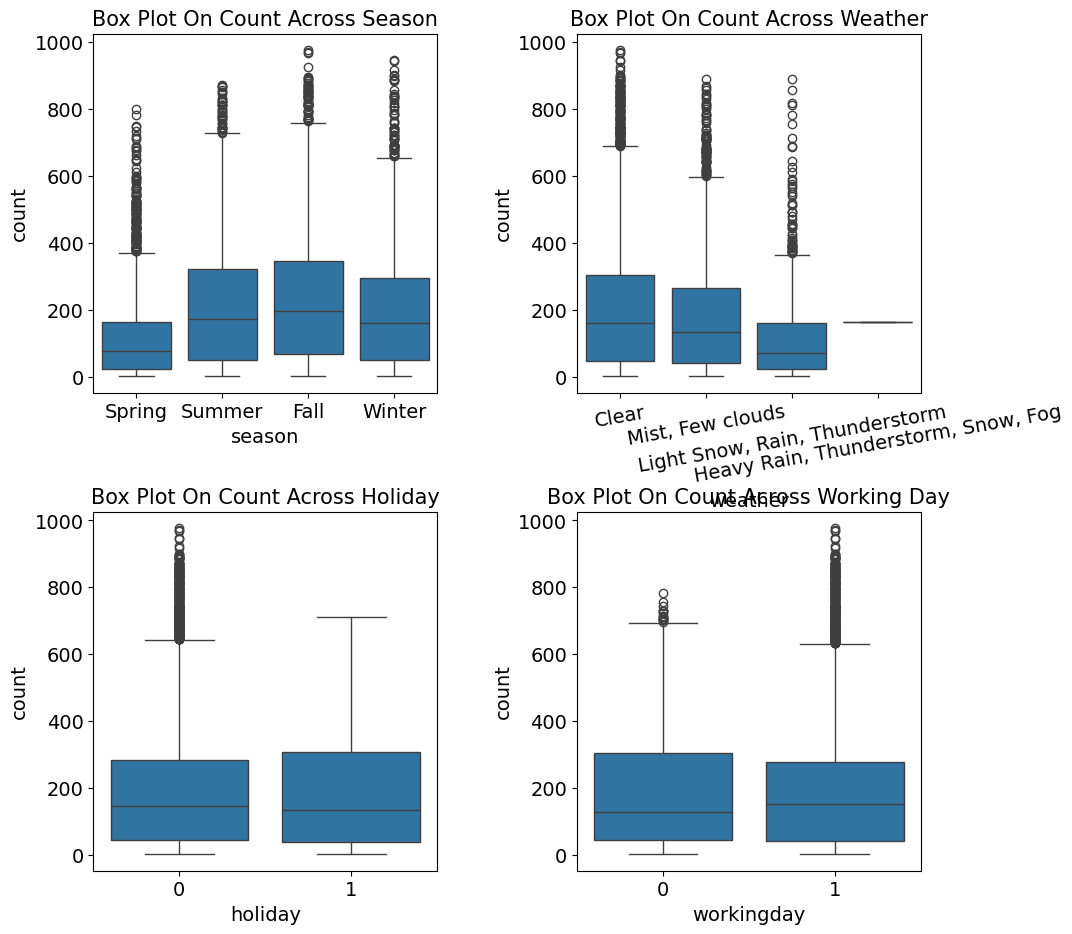

In [33]:
figure, axes = plt.subplots(nrows=2, ncols=2)
plt.tight_layout()
figure.set_size_inches(10,10)

sns.boxplot(x='season', y='count', data=train, ax=axes[0,0])
sns.boxplot(x='weather', y='count', data=train, ax=axes[0,1])
sns.boxplot(x='holiday', y='count', data=train, ax=axes[1,0])
sns.boxplot(x='workingday', y='count', data=train, ax=axes[1,1])

axes[0,0].set(title='Box Plot On Count Across Season')
axes[0,1].set(title='Box Plot On Count Across Weather')
axes[1,0].set(title='Box Plot On Count Across Holiday')
axes[1,1].set(title='Box Plot On Count Across Working Day')

axes[0,1].tick_params(axis='x', labelrotation=10)

<Axes: xlabel='hour', ylabel='count'>

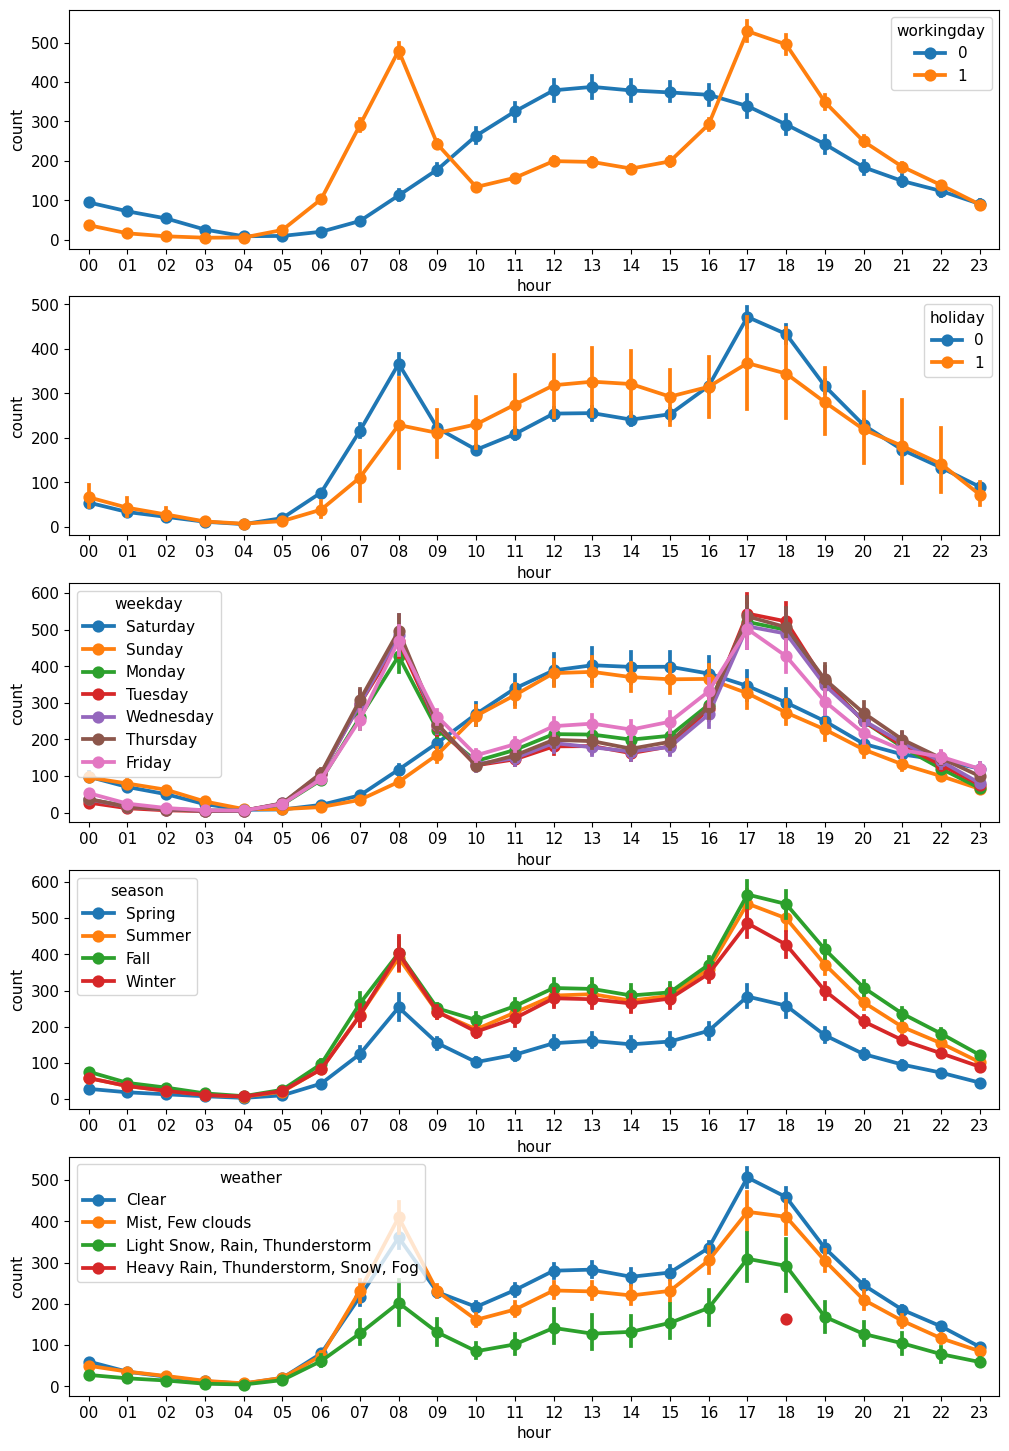

In [34]:
mpl.rc('font',size=11)
figure, axes = plt.subplots(nrows=5)
figure.set_size_inches(12,18)

sns.pointplot(x='hour', y='count', data=train, hue='workingday', ax=axes[0])
sns.pointplot(x='hour', y='count', data=train, hue='holiday', ax=axes[1])
sns.pointplot(x='hour', y='count', data=train, hue='weekday', ax=axes[2])
sns.pointplot(x='hour', y='count', data=train, hue='season', ax=axes[3])
sns.pointplot(x='hour', y='count', data=train, hue='weather', ax=axes[4])

<Axes: xlabel='humidity', ylabel='count'>

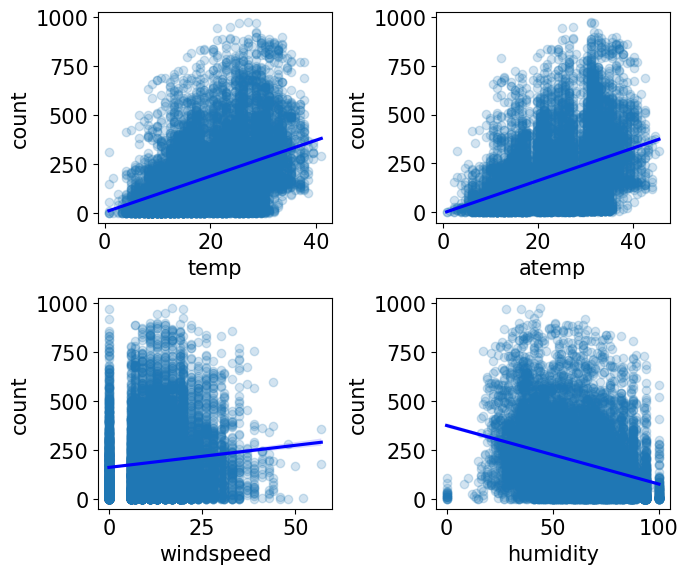

In [35]:
mpl.rc('font', size=15)
figure, axes = plt.subplots(nrows=2, ncols=2)
plt.tight_layout()
figure.set_size_inches(7,6)

sns.regplot(x='temp',y='count',data=train, ax=axes[0,0], scatter_kws={'alpha':0.2},line_kws={'color':'blue'})
sns.regplot(x='atemp',y='count',data=train, ax=axes[0,1], scatter_kws={'alpha':0.2},line_kws={'color':'blue'})
sns.regplot(x='windspeed',y='count',data=train, ax=axes[1,0], scatter_kws={'alpha':0.2},line_kws={'color':'blue'})
sns.regplot(x='humidity',y='count',data=train, ax=axes[1,1], scatter_kws={'alpha':0.2},line_kws={'color':'blue'})

In [36]:
train[['temp','atemp','humidity','windspeed','count']].corr()

,temp,atemp,humidity,windspeed,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.394454,0.389784,-0.317371,0.101369,1.000000


[Text(0.5, 1.0, 'Heatmap of Numerical Data')]

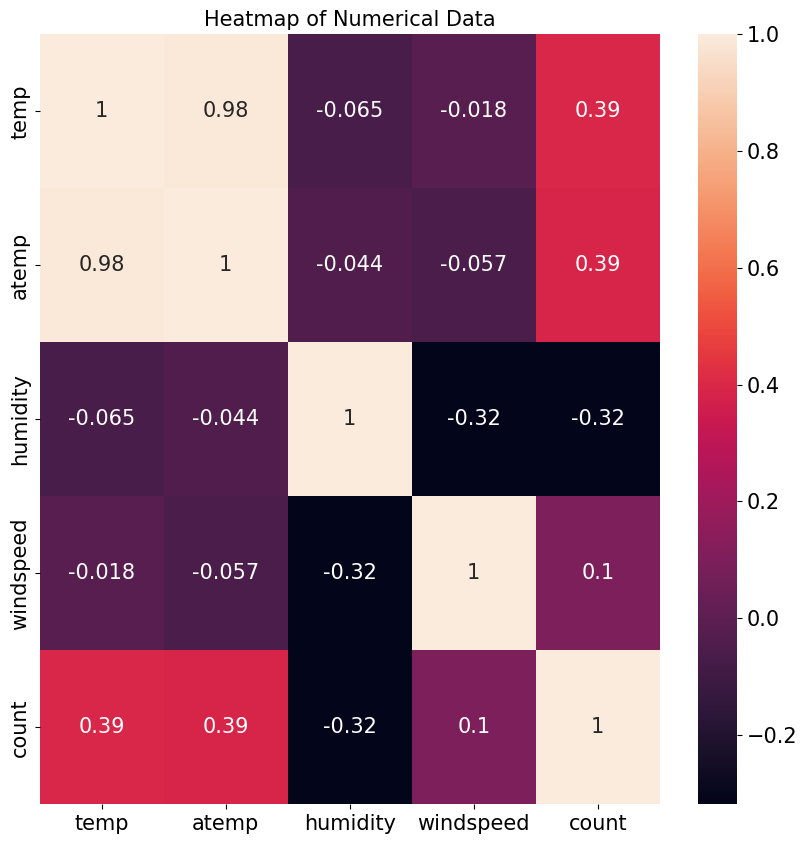

In [37]:
corrMat = train[['temp','atemp','humidity','windspeed','count']].corr()
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(corrMat, annot=True)
ax.set(title='Heatmap of Numerical Data')

# 4. 베이스라인 모델

In [38]:
train = pd.read_csv('/content/gdrive/MyDrive/Data/bike-sharing-demand/train.csv')
test = pd.read_csv('/content/gdrive/MyDrive/Data/bike-sharing-demand/test.csv')
submission = pd.read_csv('/content/gdrive/MyDrive/Data/bike-sharing-demand/submission.csv')

## 4-1. 피처 엔지니어링

In [39]:
train = train[train['weather']!=4]

In [40]:
all_data_temp = pd.concat([train, test])
all_data_temp

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN


In [41]:
all_data_temp = pd.concat([train, test], ignore_index=True)
all_data_temp

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17373,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17374,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17375,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
17376,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN


In [43]:
all_data = pd.concat([train, test], ignore_index=True)
all_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17373,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17374,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17375,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
17376,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN


- 피처 생성

In [44]:
all_data['date'] = all_data['datetime'].apply(lambda x:x.split()[0])
all_data['year'] = all_data['datetime'].apply(lambda x:x.split()[0].split('-')[0])
all_data['month'] = all_data['datetime'].apply(lambda x:x.split()[0].split('-')[1])
all_data['hour'] = all_data['datetime'].apply(lambda x:x.split()[1].split(':')[0])
all_data['weekday'] = all_data['date'].apply(lambda dateString : datetime.strptime(dateString, '%Y-%m-%d').weekday())

- 피처 삭제

In [45]:
drop_features = ['casual','registered','datetime','date','windspeed','month']

all_data = all_data.drop(drop_features, axis=1)

- 데이터 분할

In [46]:
X_train = all_data[~pd.isnull(all_data['count'])]
X_test = all_data[pd.isnull(all_data['count'])]

X_train = X_train.drop(['count'],axis=1)
X_test = X_test.drop(['count'],axis=1)

y = train['count']

In [48]:
X_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,year,hour,weekday
0,1,0,0,1,9.84,14.395,81,2011,00,5
1,1,0,0,1,9.02,13.635,80,2011,01,5
2,1,0,0,1,9.02,13.635,80,2011,02,5
3,1,0,0,1,9.84,14.395,75,2011,03,5
4,1,0,0,1,9.84,14.395,75,2011,04,5


## 4-2 평가지표 계산 함수 작성

In [49]:
import numpy as np

def rmsle(y_true, y_pred, convertExp=True):
  # 지수변환
  if convertExp:
    y_true = np.exp(y_true)
    y_pred = np.exp(y_pred)

  # 로그변환 후 결측값을 0으로 변환
  log_true = np.nan_to_num(np.log(y_true+1))
  log_pred = np.nan_to_num(np.log(y_pred+1))

  # RMSLE 계산
  output = np.sqrt(np.mean((log_true - log_pred)**2))
  return output

## 4-3 모델 훈련

In [50]:
from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression()

In [51]:
log_y = np.log(y) # 타깃값 로그 변환
linear_reg_model.fit(X_train, log_y)

LinearRegression()

## 4-4 모델 성능 검증

In [52]:
preds = linear_reg_model.predict(X_train)

In [53]:
print(f'선형 회귀의 RMSLE 값 : {rmsle(log_y, preds, True):.4f}')

선형 회귀의 RMSLE 값 : 1.0205


## 4-5 예측 및 결과 제출

In [54]:
linearreg_preds = linear_reg_model.predict(X_test)

submission['count'] = np.exp(linearreg_preds)
submission.to_csv('submission_01.csv', index=False)

# 5. 성능개선 1 : 릿지 회귀 모델
- L2 규제 적용한 선형 회귀 모델
- 규제 : 모델이 훈련 데이터에 과대적합 되지 않도록 해주는 방법
- 훈련 데이터에 과대적합되면 모델이 훈련 데이터에만 잘 들어맞고, 테스트 데이터는 제대로 예측 불가
- 릿지 회귀 모델은 성능이 좋은 편 아님. 단순 선형 회귀 모델보다 과대적합이 적은 모델 정도로 생각

## 5-1 하이퍼파라미터 최적화(모델훈련)

- 모델 생성

In [55]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

ridge_model = Ridge()

- 그리드서치 객체 생성

In [56]:
# 하이퍼파라미터 값 목록
ridge_params = {'max_iter':[3000], 'alpha':[0.1,1,2,3,4,10,30,100,200,300,400,800,900,1000]}

# 교차 검증용 평가 함수 (RMSLE 점수 계산)
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)

# 그리드서치(with릿지) 객체 생성
gridsearch_ridge_model = GridSearchCV(estimator=ridge_model,
                                      param_grid = ridge_params,
                                      scoring=rmsle_scorer,
                                      cv=5)

- 그리드서치 수행

In [57]:
log_y = np.log(y)
gridsearch_ridge_model.fit(X_train, log_y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400,
                                   800, 900, 1000],
                         'max_iter': [3000]},
             scoring=make_scorer(rmsle, greater_is_better=False, response_method='predict'))

In [58]:
print('최적 하이퍼파라미터 :',gridsearch_ridge_model.best_params_)

최적 하이퍼파라미터 : {'alpha': 0.1, 'max_iter': 3000}


## 5-2 성능 검증

In [59]:
pres = gridsearch_ridge_model.best_estimator_.predict(X_train)

print(f'릿지 회귀 RMSLE 값 : {rmsle(log_y, preds, True):.4f}')

릿지 회귀 RMSLE 값 : 1.0205


# 6. 성능개선 2 : 라쏘 회귀 모델
- L1 규제를 적용한 선형 회귀 모델
- 릿지 회귀 모델과 마찬가지로 성능이 좋은 편은 아님

## 6-1 하이퍼파라미터 최적화(모델훈련)

In [60]:
from sklearn.linear_model import Lasso

lasso_model = Lasso()

lasso_alpha = 1/np.array([0.1,1,2,3,4,10,30,100,200,300,400,800,900,1000])
lasso_params = {'max_iter':[3000], 'alpha':lasso_alpha}

gridsearch_lasso_model = GridSearchCV(estimator=lasso_model,
                                      param_grid=lasso_params,
                                      scoring=rmsle_scorer,
                                      cv=5)

log_y = np.log(y)
gridsearch_lasso_model.fit(X_train, log_y)
print('최적 하이퍼파라미터 : ',gridsearch_lasso_model.best_params_)

최적 하이퍼파라미터 :  {'alpha': 0.00125, 'max_iter': 3000}


## 6-2 성능 검증

In [61]:
preds = gridsearch_lasso_model.best_estimator_.predict(X_train)
print(f'라쏘 회귀 RMSLE 값 : {rmsle(log_y, preds, True):.4f}')

라쏘 회귀 RMSLE 값 : 1.0205


# 7. 성능개선 3 : 랜덤 포레스트 회귀 모델


## 7-1 하이퍼파라미터 최적화(모델훈련)

In [62]:
from sklearn.ensemble import RandomForestRegressor

randomforest_model = RandomForestRegressor()

rf_params = {'random_state':[42],'n_estimators':[100,120,140]}
gridsearch_random_forest_model = GridSearchCV(estimator=randomforest_model,
                                              param_grid=rf_params,
                                              scoring=rmsle_scorer,
                                              cv=5)

log_y = np.log(y)
gridsearch_random_forest_model.fit(X_train, log_y)
print('최적 하이퍼파라미터 : ',gridsearch_random_forest_model.best_params_)

최적 하이퍼파라미터 :  {'n_estimators': 140, 'random_state': 42}


## 7-2 모델 성능 검증

In [63]:
preds = gridsearch_random_forest_model.best_estimator_.predict(X_train)
print(f'랜덤 포레스트 회귀 RMSLE 값 : {rmsle(log_y, preds, True):.4f}')

랜덤 포레스트 회귀 RMSLE 값 : 0.1127


## 7-3 예측 및 결과 제출

Text(0.5, 1.0, 'Predicted Test Data Distribution')

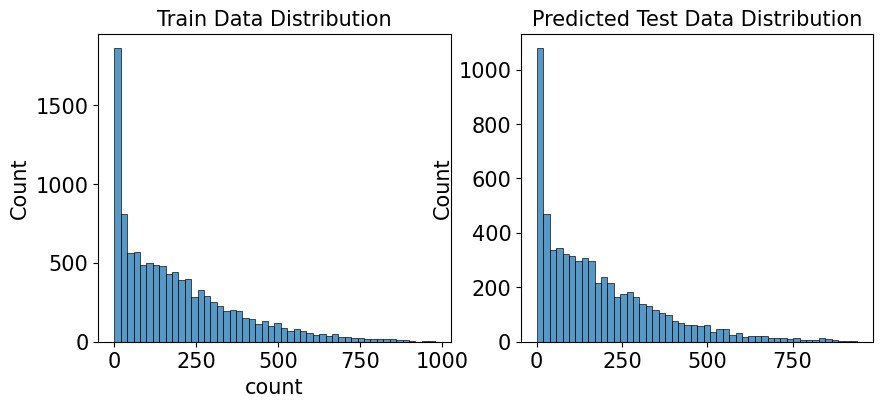

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

randomforest_preds = gridsearch_random_forest_model.best_estimator_.predict(X_test)

figure, axes = plt.subplots(ncols=2)
figure.set_size_inches(10,4)

sns.histplot(y, bins=50, ax=axes[0])
axes[0].set_title('Train Data Distribution')
sns.histplot(np.exp(randomforest_preds),bins=50,ax=axes[1])
axes[1].set_title('Predicted Test Data Distribution')

In [66]:
submission['count'] = np.exp(randomforest_preds)
submission.to_csv('submission02.csv',index=False)